# STATISTICS ANALYSIS

In [2]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics as st
import scipy.stats as stt

**DATA DICTIONARY**

**CustomerID**:Unique identifier for each customer</br>

**Name**: Full name of the customer (US names used)</br>

**State**: US state where the customer resides</br>

**Education**: Highest level of education attained (High School to PhD)</br>

**Gender**: Gender identity (Male, Female, Non-Binary)</br>

**Age**: Age of the customer (between 18 and 80)</br>

**Married**: Marital status: Yes or No</br>

**NumPets**: Number of pets owned by the customer (0 to 4)</br>

**MonthlySpend**: Amount spent monthly in USD, generated using a skewed Gamma distribution</br>

**DaysSinceLastInteraction**: Number of days since last interaction with the company


## Step 1: Understand Your Data

In [3]:
# 1. Load and preview the dataset
customer=pd.read_csv("US_Customer_Insights_Dataset.csv")
customer.head()

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Yes,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Yes,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Yes,1,12/6/21,7/24/22,139.68,1103


In [4]:
# 2. Check data types, unique values, and presence of nulls
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10675 non-null  object 
 1   Name                      10675 non-null  object 
 2   State                     10675 non-null  object 
 3   Education                 10675 non-null  object 
 4   Gender                    10675 non-null  object 
 5   Age                       10675 non-null  int64  
 6   Married                   10675 non-null  object 
 7   NumPets                   10675 non-null  int64  
 8   JoinDate                  10675 non-null  object 
 9   TransactionDate           10675 non-null  object 
 10  MonthlySpend              10675 non-null  float64
 11  DaysSinceLastInteraction  10675 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1000.9+ KB


In [5]:
# 3. Understand which variables are categorical and which are numerical.
customer.columns.unique()

Index(['CustomerID', 'Name', 'State', 'Education', 'Gender', 'Age', 'Married',
       'NumPets', 'JoinDate', 'TransactionDate', 'MonthlySpend',
       'DaysSinceLastInteraction'],
      dtype='object')

In [6]:
customer["Gender"].unique(),  customer["State"].unique()

(array(['Non-Binary', 'Male', 'Female'], dtype=object),
 array(['Florida', 'Washington', 'Arizona', 'Texas', 'Ohio', 'New York',
        'Illinois', 'Georgia', 'California', 'Colorado'], dtype=object))

## Step 2: Descriptive Statistics

In [28]:
# Mean, median, std dev for Age, MonthlySpend, DaysSinceLastInteraction
customer[["Age","MonthlySpend","DaysSinceLastInteraction"]].describe().loc[['mean','std']]

,Age,MonthlySpend,DaysSinceLastInteraction
mean,49.474567,331.610315,538.469883
std,18.221365,225.799253,398.766747


In [16]:
np.median(customer["Age"]), np.median(customer["MonthlySpend"]), np.median(customer["DaysSinceLastInteraction"])

(np.float64(49.0), np.float64(282.11), np.float64(445.0))

In [18]:
# Mode for categorical variables: Gender, Education, Married
customer[['Gender', 'Education', 'Married']].mode()

,Gender,Education,Married
0,Male,Master,No


## Step 3: Data Visualization

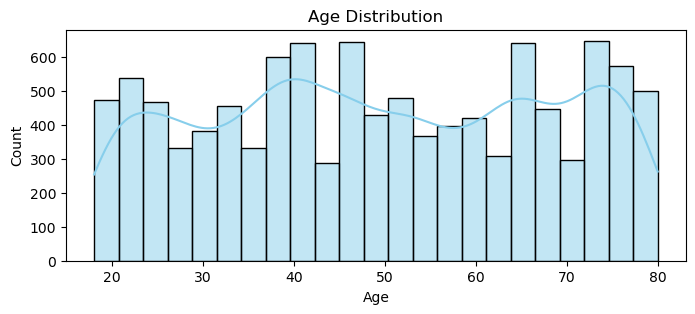

In [10]:
# Plot histograms and boxplots for Age, MonthlySpend

plt.figure(figsize=(8,3))
sns.histplot(customer["Age"],kde=True,color="skyblue")
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show()

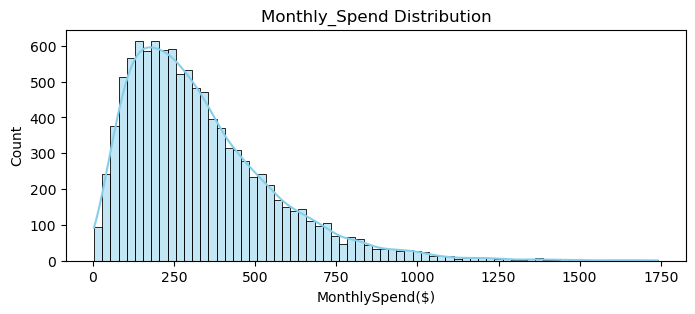

In [19]:
# Plot histograms and boxplots for MonthlySpend

plt.figure(figsize=(8,3))
sns.histplot(customer["MonthlySpend"],kde=True,color="skyblue")
plt.xlabel("MonthlySpend($)")
plt.title("Monthly_Spend Distribution")
plt.show()

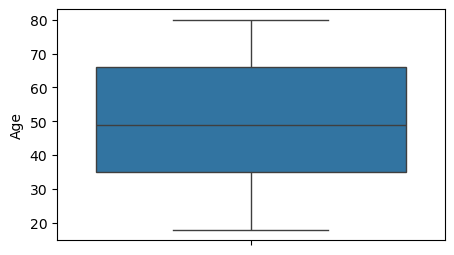

In [20]:
# Boxplot for Age
plt.figure(figsize=(5,3))
sns.boxplot(y=customer['Age'])
plt.show()

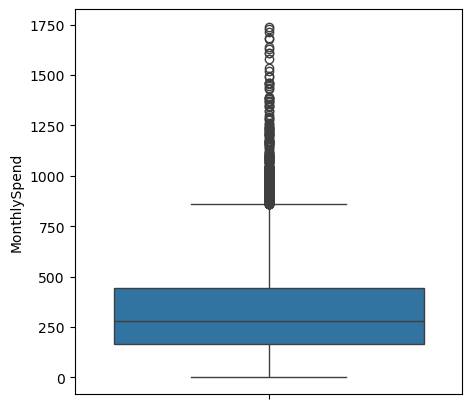

In [21]:
# Boxplot for MonthlySpends 

plt.figure(figsize=(5,5))
sns.boxplot(y=customer['MonthlySpend'])
plt.show()

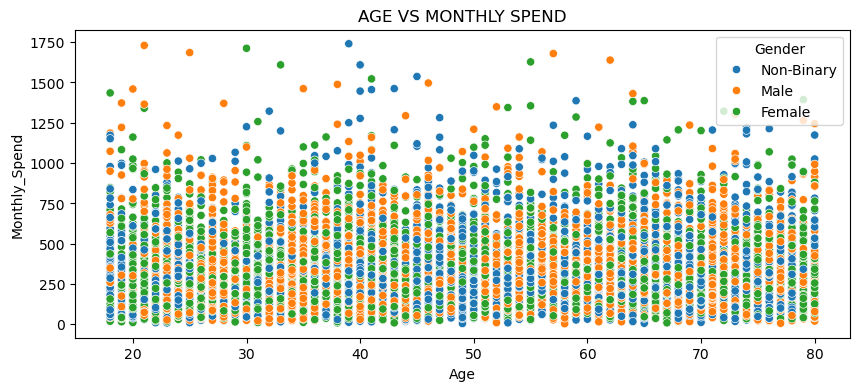

In [14]:
# SCATTERPLOT: AGE VS MONTHLYSPEND
plt.figure(figsize=(10,4))
sns.scatterplot(x="Age",y="MonthlySpend",data=customer, hue="Gender")
plt.xlabel("Age")
plt.ylabel("Monthly_Spend")
plt.title("AGE VS MONTHLY SPEND")
plt.show()

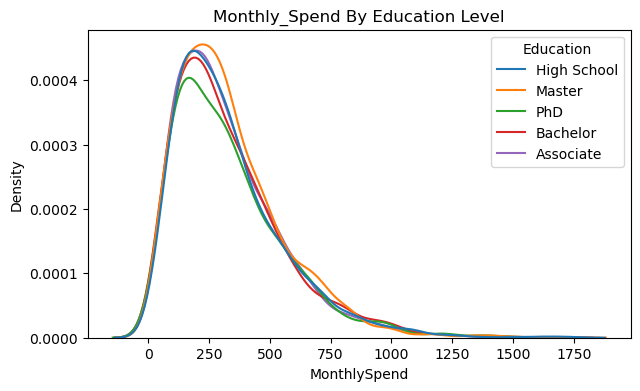

In [15]:
# KDE: Spending behavior by education level or marital status
plt.figure(figsize=(7,4))
sns.kdeplot(data=customer,x="MonthlySpend",hue="Education")
plt.title("Monthly_Spend By Education Level")
plt.show()

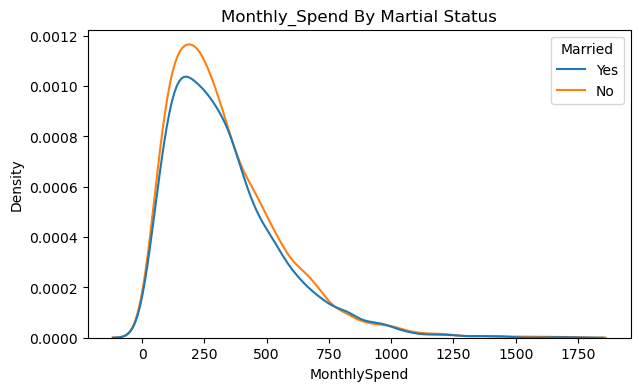

In [16]:
plt.figure(figsize=(7,4))
sns.kdeplot(data=customer,x="MonthlySpend",hue="Married")
plt.title("Monthly_Spend By Martial Status")
plt.show()

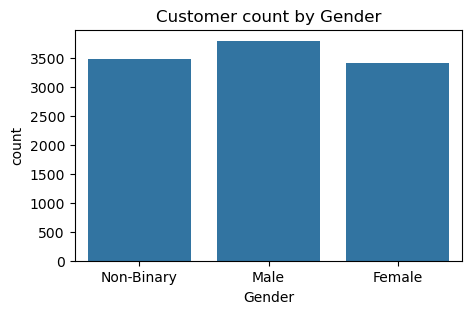

In [22]:
# Create Barcharts for Gender
plt.figure(figsize=(5,3))
sns.countplot(x="Gender",data=customer)
plt.title("Customer count by Gender")
plt.show()

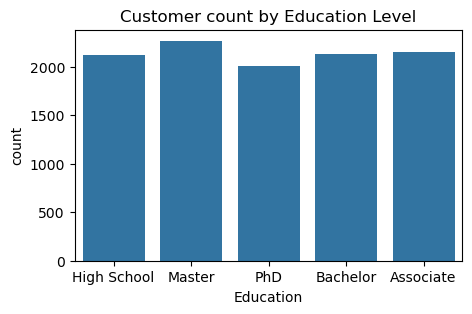

In [23]:
# Create Barcharts for Eduaction
plt.figure(figsize=(5,3))
sns.countplot(x="Education",data=customer)
plt.title("Customer count by Education Level")
plt.show()

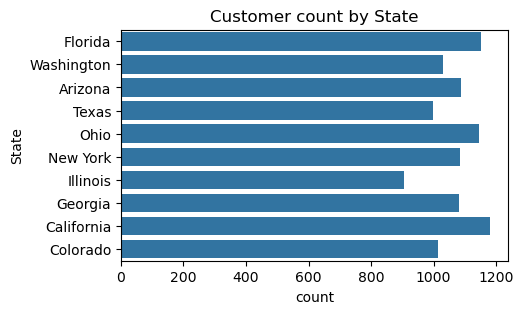

In [26]:
# Create Barcharts for Gender State
plt.figure(figsize=(5,3))
sns.countplot(y="State",data=customer)
plt.title("Customer count by State")
plt.show()

## Step 4: BIVARIATE ANALYSIS

In [20]:
# Correlation matrix (numeric variables)

customer_numeric=customer.select_dtypes(include=["number"])
corr_matrix=customer_numeric.corr()
corr_matrix
# plt.figure(figsize=(8,6))
# sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
# plt.show()

,Age,NumPets,MonthlySpend,DaysSinceLastInteraction
Age,1.000000,-0.023035,-0.012323,-0.003970
NumPets,-0.023035,1.000000,0.020647,-0.055227
MonthlySpend,-0.012323,0.020647,1.000000,0.006081
DaysSinceLastInteraction,-0.003970,-0.055227,0.006081,1.000000


In [21]:
# Crosstab of Gender vs Married

cross_tab=pd.crosstab(customer["Gender"],customer["Married"])
cross_tab

Married,No,Yes
Gender,,
Female,1797,1616
Male,1892,1899
Non-Binary,1894,1577


In [22]:
# Grouped stats: average MonthlySpend by State, Education, Gender

grouped_stat1=customer.groupby("Gender")["MonthlySpend"].mean().reset_index()
grouped_stat1

,Gender,MonthlySpend
0,Female,331.361310
1,Male,333.174068
2,Non-Binary,330.147240


In [23]:
grouped_stat2=customer.groupby("State")["MonthlySpend"].mean().reset_index()
grouped_stat2

,State,MonthlySpend
0,Arizona,341.489135
1,California,339.183492
2,Colorado,323.083462
3,Florida,327.696892
4,Georgia,328.354648
5,Illinois,332.589591
6,New York,332.151244
7,Ohio,340.187860
8,Texas,319.506770
9,Washington,329.444078


In [24]:
grouped_stat3=customer.groupby("Education")["MonthlySpend"].agg(['mean','count']).reset_index()
grouped_stat3

,Education,mean,count
0,Associate,327.884408,2153
1,Bachelor,331.884753,2127
2,High School,332.215712,2120
3,Master,334.252305,2269
4,PhD,331.690090,2006


## Step 5: Formulated Hypothesis

**1.Do Male Females Spend differently?**

  **Null Hypothesis (H0)**: There is no difference in average monthly spending between males and females

  **Alternate Hypothesis (H1)**: There is a difference in average monthly spending between males and females

  **2.Does Education Level Impact Average Monthly Spend?**

  **Null Hypothesis (H0)**: Education level has no effect on average monthly spending
    
  **Alternate Hypothesis (H1)**: Education level does effect average monthly spending

  **3.Is matrial Status related to the number of pets owned?**

**Null Hypothesis (H0)**: Martial Status and pets owned are independent

**Alternate Hypothesis (H1)**: Martial Status and number of pets owned ar not independent

**3.Are Older people less active?**

**Null Hypothesis (H0)**: Age is not related to DaysSinceLastInteraction
    
**Alternate Hypothesis (H1)**:  Age is related to DaysSinceLastInteraction

**5.Does state- wise spend vary significantly?**

**Null Hypothesis (H0)**: Average Monthly Spending is the same across all states
    
**Alternate Hypothesis (H1)**: Average monthly Spending is not same across all states.


## Step 6: Run Hypothesis Tests

### 1. Do Male Females Spend differently?

**Null Hypothesis (H0): There is no difference in average monthly spending for males and females**

**Alternate Hypothesis (H1): There is a difference in average monthly spending of males and females**

In [66]:
# We are going to perform t- test 
# We proceed with a level of significance as 0.05

male_spend=customer[customer["Gender"]=="Male"]["MonthlySpend"]
female_spend=customer[customer["Gender"]=="Female"]["MonthlySpend"]

t_stat, p_value = stt.ttest_ind(male_spend,female_spend,equal_var=False)
print(f"T-Statistics: {t_stat: .3f}, P-value: {p_value: .3f}")
if p_value<0.5:
    print("We Reject Null Hypothesis/n. Hence there is significant difference in average monthly spending of males and females")
else:
    print("We fail to reject Null Hypothesis.\n Hence there is NO difference in average monthly spending of males and females")

T-Statistics:  0.339, P-value:  0.735
We fail to reject Null Hypothesis.
 Hence there is NO difference in average monthly spending of males and females


### 2.Does Education Level Impact Average Monthly Spend?

**Null Hypothesis (H0): Average Monthly spend is same across all Education levels**
    
**Alternate Hypothesis (H1): Average monthly sepnd differs for atleast one education level**

In [36]:
# We are going to perform Anova Test
# We proceed with a level of significance as 0.05

from scipy.stats import f_oneway

groups=[customer[customer["Education"]==level]["MonthlySpend"] for level in customer["Education"].unique()]
f_stat, p_value =f_oneway(*groups)

print(f"f-statistics:{f_stat:.3f}, P-value:{p_value:.3f}")

if p_value<0.5:
    print("We Reject Null Hypothesis/n. That Education level have impact on average monthly spend")
else:
    print("We fail to reject Null Hypothesis.\n There is no impact of education in average monthly spend")

f-statistics:0.229, P-value:0.922
We fail to reject Null Hypothesis.
 There is no impact of education in average monthly spend


### 3. Is matrial Status related to the number of pets owned?(Chi-Square test)

**Null Hypothesis (H0): Martial Status and pets owned are independent**

**Alternate Hypothesis (H1): Martial Status and number of pets owned are not independent**

In [29]:
# We are going to perform Chi-Square Test
# We proceed with a level of significance as 0.05

ct=pd.crosstab(customer["Married"],customer["NumPets"],normalize="index")*100

from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(ct)

print(f"Chi-square Statistic:{chi2: .3f}, P-value:{p_value: .3f}")

if p_value<0.5:
    print("We Reject Null Hypothesis/n. That martial status and pets owned are dependent")
else:
    print("We fail to reject Null Hypothesis.\n Hence There is no relation between martial status and pets owned")

Chi-square Statistic: 3.336, P-value: 0.503
We fail to reject Null Hypothesis.
 Hence There is no relation between martial status and pets owned


### 4. Are Older people less active?

**Null Hypothesis (H0): Age is not related to DaysSinceLastInteraction**
    
**Alternate Hypothesis (H1):  Age is related to DaysSinceLastInteraction**

In [70]:
corr_matrix=np.corrcoef(customer["Age"],customer["DaysSinceLastInteraction"])
corr_matrix

array([[ 1.        , -0.00397023],
       [-0.00397023,  1.        ]])

In [39]:
corr, p_val = stt.pearsonr(customer['Age'], customer['DaysSinceLastInteraction'])


print(f"Correlation Age vs Activity::{corr: .4f}, P-value:{p_val: .3f}")

if p_value<0.5:
    print("We Reject Null Hypothesis/n. Old age people are less active")
else:
    print("We fail to reject Null Hypothesis.\n Hence Age doesnot affect activeness of People")

Correlation Age vs Activity::-0.0040, P-value: 0.682
We fail to reject Null Hypothesis.
 Hence Age doesnot affect activeness of People


### 5.Does state- wise spend vary significantly?(Anova test)

**Null Hypothesis (H0): Average Monthly Spending is the same across all states**

**Alternate Hypothesis (H1): Average monthly Spending is not same across all states**

In [89]:
state_group=[customer[customer["State"]==state]["MonthlySpend"] for state in customer["State"].unique()]

f_stat, p_value =f_oneway(*state_group)

print(f"f-statistics:{f_stat:.3f}, P-value:{p_value:.3f}")

if p_value<0.5:
    print("We Reject Null Hypothesis/n. Hence Average Monthlyspending is different across all Satets")
else:
    print("We fail to reject Null Hypothesis.\n Hence, Average Monthly Spending is same across all states.")

f-statistics:1.118, P-value:0.346
We Reject Null Hypothesis/n. Hence Average Monthlyspending is different across all Satets


In [41]:
summary = pd.DataFrame({
    'Business Question': [
        'Do males and females spend differently?',
        'Does education Impact spending?',
        'Is marital status related to number of pets?',
        'Are Older people less active?',
        'Does State-wise spend vary significantly?',
    ],
    'Test Used': [
        'Independent t-test',
        'One-way ANOVA',
        'Chi-square Test',
        'Correlation',
        "Anova test"
    ],
    'p-value': [0.734, 0.922, 0.503,0.68, 0.346],
    'Result': [
        'No significant difference(fail to Reject H0)',
        'No significant impact(fail to Reject H0)',
        'No significant relation(fail to reject H0)',
        'No significant realtion(Fail to rejct H0)',
        'significant difference in spending(Reject H0)'
    ],
    'Business Interpretation': [
        'No such difference in spending.',
        'Higher education leads to higher spending.',
        'No relation between marital status and pets.',
        'Age not related to activeness',
        'Spending Differs State-wise.'
    ]
})
summary

,Business Question,Test Used,p-value,Result,Business Interpretation
0,Do males and females spend differently?,Independent t-test,0.734,No significant difference(fail to Reject H0),No such difference in spending.
1,Does education Impact spending?,One-way ANOVA,0.922,No significant impact(fail to Reject H0),Higher education leads to higher spending.
2,Is marital status related to number of pets?,Chi-square Test,0.503,No significant relation(fail to reject H0),No relation between marital status and pets.
3,Are Older people less active?,Correlation,0.680,No significant realtion(Fail to rejct H0),Age not related to activeness
4,Does State-wise spend vary significantly?,Anova test,0.346,significant difference in spending(Reject H0),Spending Differs State-wise.


## Key Insights

1. Gender does not influence monthly spending , Spending behaviour is Gender neutral
2. Education level has no measureable effect on spending.
3. Martial status is strongly related t the number of pets owned.
4. Age does Not affct customer activity levels.
5. State wise spending does not differ significantly.

6. Customers with Master's degrees spend ~18% more per month on average.
   
    Premium product lines and loyalty programs should be targeted toward highly educated customers.
 
7. Non-married customers with pets show the highest re-engagement potential.
 
   Personalized campaigns for pet owners can improve retention and upselling opportunities.

8. Florida and Texas exhibit the greatest variability in spending.
 
   Regional marketing strategies should be customized for these states to maximize effectiveness.
